<h1 style="text-align:center;">
BITCOIN: Local realisation: Private to public, Elliptic curve,signature, verification, Asymmetric cryptography using BTC EC... 
</h1>

# Introduction

### Why this project ? 

In this project we will make our version of BTC protocol using only common libraries such NumPy, Hashlib.
<br> 
This project is for education prepose, please don't use it for real bitcoin transaction. 
* We will start by presenting the elliptic curve and its operations: addition, doubling, multiplication scalar / points.
* We will develop some functions to convert a private key to public key and to BTC address.
* We will developpe also functions for signature and verification.
* In the end, we will introduce the ECDH key agreement protocol and use it in AES secure cryptography/communication

<div style="text-align: center;">
    <img src="BTC_EC.PNG" style="width: 50%;text-align: center;">
</div>

# Table of contents

# Elliptic curve cryptography of the BTC Secp256K1

### General libraries

In [1]:
import hashlib
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy

In [2]:
import warnings
# Disable warning
warnings.filterwarnings("ignore")

### General case $y^2=x^3+a x^2+b$

**Exemple de courbes elliptiques basées sur les paramètres a, b**

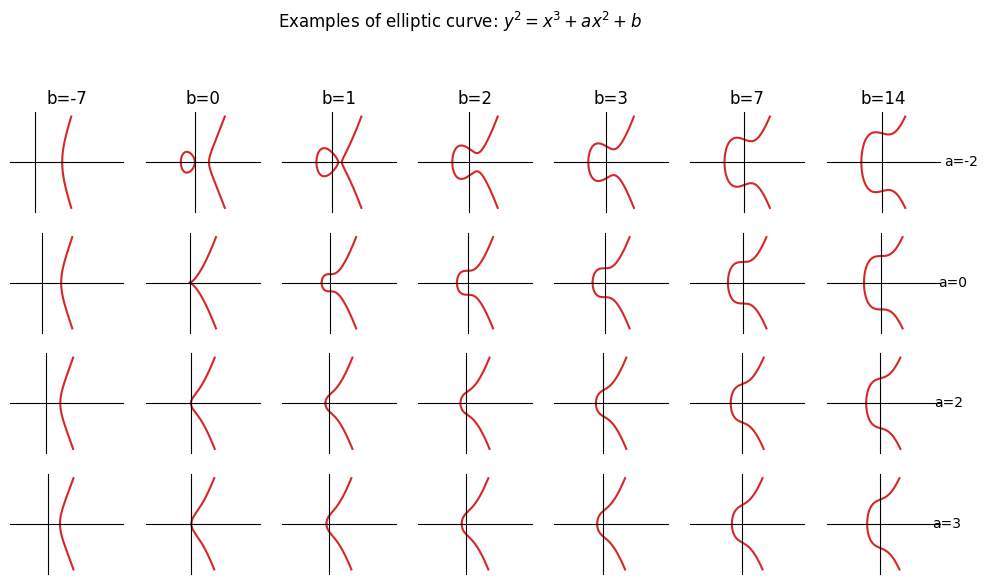

In [3]:
A=[-2,0,2,3]
B=[-7,0,1,2,3,7,14]

# Create subplots grid
fig, ax = plt.subplots(nrows=len(A), ncols=len(B),figsize=(12,6))

# Define x values for plotting
x=np.linspace(-3,3,10000)

# Iterate over combinations of parameters a and b
for i,a in enumerate(A):
    for j,b in enumerate(B):
        
        # Calculate y values based on elliptic curve equation
        y=np.sqrt(x**3+a*x+b)

        # Plot the curve and its reflection
        ax[i,j].plot(x,y,c='C3')
        ax[i,j].plot(x,-y,c='C3')

        # Set aspect ratio to equal and adjust spines
        ax[i,j].axis('equal')
        ax[i,j].spines['left'].set_position('zero')  # Move the left spine to x=0
        ax[i,j].spines['bottom'].set_position('zero')  # Move the bottom spine to y=0
        ax[i,j].spines['right'].set_color('none')  # Remove the right spine
        ax[i,j].spines['top'].set_color('none')  # Remove the top spine

        # Remove x and y ticks
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        # Set subplot titles for b values
        if i == 0: 
            ax[i,j].set_title('b='+str(b))

        # Add annotation for a values on the rightmost subplots
        if j == len(B)-1: 
            ax[i,j].text(8,0,'a='+str(a), ha='left', va='center')
# Set the main title for the entire figure
fig.suptitle('Examples of elliptic curve: $y^2=x^3+a x^2+b$',y=1.05)

# Display the plot
plt.show()         

## Bitcoin elliptic curve $y^2=x^3+7$

**$y=\sqrt{x^3+7}$ function**

In [4]:
# Define function to calculate y values for BTC elliptic curve
def y_curve(x):
    return np.sqrt(x**3 + 7)

**Plot**

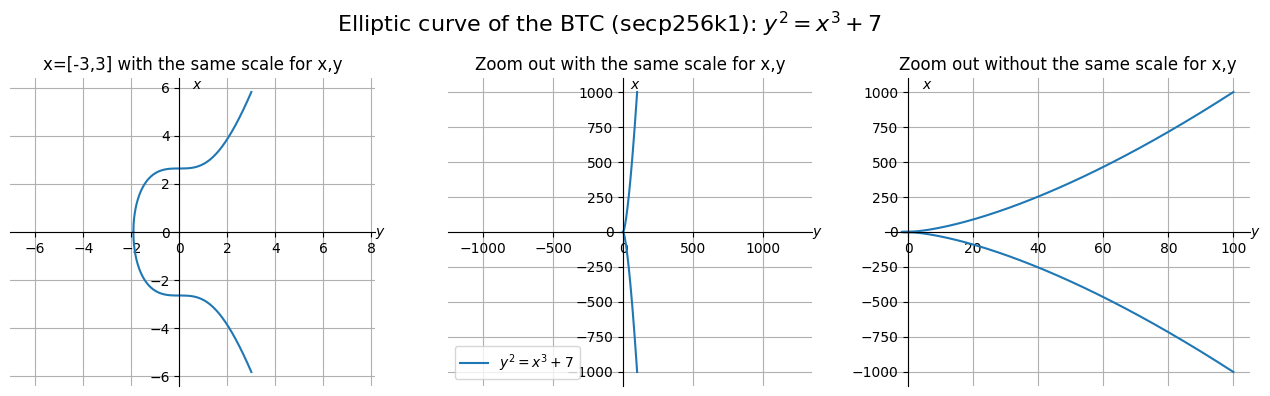

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,4))
ax1,ax2,ax3=ax

# Plot the curve in the first subplot with x range [-7^(1/3), 3]
x=np.linspace(-7**(1/3),3,1000)
y=y_curve(x)

# Positive y 
ax1.plot(x,y,c='C0')
# Negative y
ax1.plot(x,-y,c='C0')

# Set spines position to make them intersect at (0,0)
ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

# sets axes labels on both ends
ax1.annotate('$y$', xy=(1, 0.52), ha='left', va='top', xycoords='axes fraction')
ax1.annotate('$x$', xy=(0.5, 1), ha='left', va='top', xycoords='axes fraction')

# Set equal aspect ratio
ax1.axis('equal')

ax1.grid()
ax1.set_title('x=[-3,3] with the same scale for x,y')

# Plot the curve in the second subplot with larger x range [-7^(1/3), 100]
x=np.linspace(-7**(1/3),100,1000)
y=y_curve(x)

# Positive y 
ax2.plot(x,y,c='C0', label=r'$y^2=x^3+7$')
# Negative y
ax2.plot(x,-y,c='C0')

# Set spines position to make them intersect at (0,0)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

# sets axes labels on both ends
ax2.annotate('$y$', xy=(1, 0.52), ha='left', va='top', xycoords='axes fraction')
ax2.annotate('$x$', xy=(0.5, 1), ha='left', va='top', xycoords='axes fraction')

# Set equal aspect ratio
ax2.axis('equal')

ax2.legend(loc='lower left')
ax2.grid()
ax2.set_title('Zoom out with the same scale for x,y')

# Plot the curve in the third subplot with the same x range as the second but without equal aspect ratio
ax3.plot(x,y,c='C0')
# Negative y
ax3.plot(x,-y,c='C0')

# Set spines position to make them intersect at (0,0)
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')

# sets axes labels on both ends
ax3.annotate('$y$', xy=(1, 0.52), ha='left', va='top', xycoords='axes fraction')
ax3.annotate('$x$', xy=(0.1, 1), ha='left', va='top', xycoords='axes fraction')

ax3.grid()
ax3.set_title('Zoom out without the same scale for x,y')

# Set main title for the figure
fig.suptitle('Elliptic curve of the BTC (secp256k1): $y^2=x^3+7$', fontsize=16,y=1.05)

# Show the plot
plt.show()


### Bitcoin elliptic curve: Add 2 points and Doubling a point: Illustration

**Point class**

Below a sample class of point, this class store simply the coordinates x,y of a point

In [6]:
class point():
    def __init__(self,x=0,y=0):
        self.x=x
        self.y=y
    def coord(self):
        return np.array([self.x,self.y]) 

In [7]:
def add_points(P,Q):
    """
    Perform addition operation on two points on an elliptic curve.
    
    Args:
        P: First point on the elliptic curve represented as an object with attributes x and y.
        Q: Second point on the elliptic curve represented as an object with attributes x and y.
        
    Returns:
        R: The result of adding the two input points on the elliptic curve.
    """
    # Reference: https://www.youtube.com/watch?v=F3zzNa42-tQ&t=894s
    # Time stamp in the video: 3:44
    
    # Calculate the slope for the addition operation
    s=(P.y-Q.y)/(P.x-Q.x)
    
    # Calculate the new x and y coordinates for the sum of points
    xr=s**2-(P.x+Q.x)
    yr=s*(P.x-xr)-P.y
    
    # Create a new point representing the result of addition
    R=point(xr,yr)
    
    return R

In [8]:
def point_doubling(P):
    """
    Perform point doubling operation on an elliptic curve.
    
    Args:
        P: A point on the elliptic curve represented as an object with attributes x and y.
        
    Returns:
        R: The result of doubling the input point on the elliptic curve.
    """
    # Reference: https://www.youtube.com/watch?v=F3zzNa42-tQ&t=894s
    # Time stamp in the video: 4:57
    
    # a, b parameters
    a=0
    b=7
    # Calculate the slope for the point doubling operation
    s=(3*P.x**2+a)/(2*P.y)
    
    # Calculate the new x and y coordinates for the doubled point
    xr=s**2-2*P.x
    yr=s*(P.x-xr)-P.y
    
    # Create a new point representing the result of doubling
    R=point(xr,yr)
    
    return R

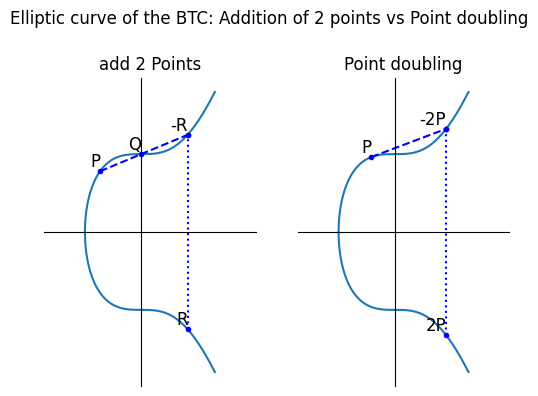

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6,4))
ax1,ax2=ax

################## AXE 1: ADD 2 POINTS#######################
# Define points P and Q
P=point()
P.x=-1.4
P.y=y_curve(P.x)

Q=point()
Q.x=0
Q.y=y_curve(Q.x)

# Perform addition operation on points P and Q
R=add_points(P,Q)
R_=point(x=R.x,y=-R.y)

# Plot the curve and its reflection for positive and negative y
x=np.linspace(-7**(1/3),2.5,1000)
y=y_curve(x)
ax1.plot(x,y,c='C0')
ax1.plot(x,-y,c='C0')

# Plot points P, Q, and -R
x,y=[P.x,Q.x,R_.x],[P.y,Q.y,R_.y]
ax1.plot(x,y, linestyle='--',c='b', marker='.')
text=["P","Q","-R"]
# Add text annotations close to each point
for i, txt in enumerate(text):
    ax1.text(x[i], y[i], txt, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Plot points R and -R
x,y=[R.x,R_.x],[R.y,R_.y]
ax1.plot(x,y, linestyle='dotted',c='b', marker='.')
text=["R",""]
# Add text annotations close to each point
for i, txt in enumerate(text):
    ax1.text(x[i], y[i], txt, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Set spines position to make them intersect at (0,0)
ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

# Remove x-y ticks
ax1.set_xticks([])
ax1.set_yticks([])

# Set equal aspect ratio
ax1.axis('equal')

ax1.set_title('add 2 Points')

################## AXE 2: DOUBLE A POINT######################
# Define point P
P=point()
P.x=-0.8
P.y=y_curve(P.x)

# Double the point P
P2=point_doubling(P)
P2_=point(x=P2.x,y=-P2.y)

# Plot the curve and its reflection for positive and negative y
x=np.linspace(-7**(1/3),2.5,1000)
y=y_curve(x)
ax2.plot(x,y,c='C0', label=r'$y^2=x^3+7$')
ax2.plot(x,-y,c='C0')

# Plot points P and -2P
x,y=[P.x,P2_.x],[P.y,P2_.y]
ax2.plot(x,y, linestyle='--',c='b', marker='.')
text=["P","-2P"]
# Add text annotations close to each point
for i, txt in enumerate(text):
    ax2.text(x[i], y[i], txt, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Plot points 2P and -2P
x,y=[P2.x,P2_.x],[P2.y,P2_.y]
ax2.plot(x,y, linestyle='dotted',c='b', marker='.')
text=["2P",""]
# Add text annotations close to each point
for i, txt in enumerate(text):
    ax2.text(x[i], y[i], txt, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Remove x-y ticks
ax2.set_xticks([])
ax2.set_yticks([])

# Set spines position to make them intersect at (0,0)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

# Set equal aspect ratio
ax2.axis('equal')

ax2.set_title('Point doubling')

fig.suptitle('Elliptic curve of the BTC: Addition of 2 points vs Point doubling',y=1.05)
plt.show()

### Bitcoin elliptic curve: Add 2 points and Doubling a point: for integers

### Secp256K1 Parameters
<br> For more information, see the link: https://en.bitcoin.it/wiki/Secp256k1

In [10]:
def Secp256K1_params(hexint='hex'):
    """
    Retrieve the parameters for the secp256k1 elliptic curve used in Bitcoin.

    Args:
        hexint: A string indicating whether to return the parameters as hex strings ('hex') or integers ('int').

    Returns:
        Thex: List of hex strings representing the parameters if hexint is 'hex'.
        Tint: List of integers representing the parameters if hexint is 'int'.
    """
    # Source: https://en.bitcoin.it/wiki/Secp256k1

    # Parameters in hexadecimal format
    p = 'FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F'.replace(' ','')
    a = '00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000'.replace(' ','')
    b = '00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007'.replace(' ','')
    Gx = '79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798'.replace(' ','')
    Gy = '483ADA77 26A3C465 5DA4FBFC 0E1108A8 FD17B448 A6855419 9C47D08F FB10D4B8'.replace(' ','')
    n = 'FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE BAAEDCE6 AF48A03B BFD25E8C D0364141'.replace(' ','')
    h = '01'
    Thex= {'p':p,'a':a,'b':b,'Gx':Gx,'Gy':Gy,'n':n,'h':h}
    
    # Convert hex strings to integers
    Tint=dict()
    for (k,v) in Thex.items():
        Tint[k]=int(v,16)
    
    # Return the parameters based on the input format specified
    if hexint == 'hex':
        return Thex
    elif hexint == 'int':
        return Tint

Example of use

In [11]:
Secp256K1_params('int')

{'p': 115792089237316195423570985008687907853269984665640564039457584007908834671663,
 'a': 0,
 'b': 7,
 'Gx': 55066263022277343669578718895168534326250603453777594175500187360389116729240,
 'Gy': 32670510020758816978083085130507043184471273380659243275938904335757337482424,
 'n': 115792089237316195423570985008687907852837564279074904382605163141518161494337,
 'h': 1}

In [12]:
Secp256K1_params('hex')

{'p': 'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F',
 'a': '0000000000000000000000000000000000000000000000000000000000000000',
 'b': '0000000000000000000000000000000000000000000000000000000000000007',
 'Gx': '79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798',
 'Gy': '483ADA7726A3C4655DA4FBFC0E1108A8FD17B448A68554199C47D08FFB10D4B8',
 'n': 'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141',
 'h': '01'}

### Point additions (P+Q), point double (2P) for integers

In [13]:
def add_points_int(P, Q):
    """
    This function computes the addition operation on two points (P and Q) on the Bitcoin (BTC) elliptic curve.
    The addition operation effectively finds the point on the curve that results from adding point P to point Q.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        P (point): A point on the Bitcoin elliptic curve represented as an object with x and y coordinates.
        Q (point): Another point on the Bitcoin elliptic curve represented as an object with x and y coordinates.

    Returns:
        point: The result of adding the input points P and Q on the Bitcoin elliptic curve.
    """
    # Retrieve the prime number p defining the Bitcoin elliptic curve parameters
    p = Secp256K1_params('int')['p']
    
    # Compute the slope of the line passing through points P and Q
    s = ((P.y - Q.y) * pow(P.x - Q.x, -1, p)) % p
    
    # Compute the x-coordinate of the sum of points P and Q
    xr = (pow(s, 2, p) - (P.x + Q.x)) % p
    
    # Compute the y-coordinate of the sum of points P and Q
    yr = ((s * (P.x - xr)) % p - P.y) % p
    
    # Create a new point object representing the result of addition
    R = point(xr, yr)
    
    # Return the sum of points P and Q
    return R

In [14]:
def point_doubl_int(P):
    """
    This function computes the doubling operation on a point (P) on the Bitcoin (BTC) elliptic curve.
    The doubling operation effectively finds the point on the curve that results from adding the point P to itself.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        P (point): A point on the Bitcoin elliptic curve represented as an object with x and y coordinates.

    Returns:
        point: The result of doubling the input point P on the Bitcoin elliptic curve.
    """
    # get a, b parameters 
    a=Secp256K1_params('int')['a']
    b=Secp256K1_params('int')['b']
    # Retrieve the prime number p defining the Bitcoin elliptic curve parameters
    p = Secp256K1_params('int')['p']
    
    # Compute the slope of the tangent line to the curve at point P
    s = ((3 * pow(P.x, 2, p) + a) * pow(2 * P.y, -1, p)) % p
    
    # Compute the x-coordinate of the doubled point
    xr = (pow(s, 2, p) - 2 * P.x) % p
    
    # Compute the y-coordinate of the doubled point
    yr = (s * (P.x - xr) - P.y) % p
    
    # Create a new point object representing the result of doubling
    R = point(xr, yr)
    
    # Return the doubled point
    return R

### Scalar and point multiplication (k.P) for integers

The below code show how we can do the k*P multiplication <br> for demonstration P is a scalar in this example<br> this algorithm perform the multiplication using only addition but with the minimum operations

In [15]:
# Initialize the integer k and the point P
k = 12
P = 5  # Initial point P

# Calculate the expected result of multiplying point P by integer k using scalar multiplication
expected_result = k*P

k = bin(k)[2:]  # Convert k to binary
k = [int(b) for b in list(k)]  # Convert binary k to a list of integers

start = True  # Flag to indicate the start of the loop
for i in k[::-1]:
    if i:
        if start:
            result = copy(P)  # Initialize result as a copy of point P
            start = False
        else:
            result = (result + P)  # Add point P to result
    P = P + P  # Double point P in each iteration of the loop



# Print the result and the expected result
print("k*P with this algorithm",result, "The expected value",expected_result)

k*P with this algorithm 60 The expected value 60


**The below use the same algo to do the multiplication k*P**

In [16]:
def multiplkP(k, P):
    """
    This function performs scalar multiplication on the Bitcoin (BTC) elliptic curve.
    The scalar multiplication operation effectively multiplies a point P on the curve by an integer k.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        k (int): The integer by which the point P is to be multiplied.
        P (point): The point on the Bitcoin elliptic curve represented as an object with x and y coordinates.

    Returns:
        point: The result of multiplying the point P by the integer k on the Bitcoin elliptic curve.
    """
    
    # Convert k to binary
    k = bin(k)[2:]
    
    # Convert binary k to a list of integers
    k = [int(b) for b in list(k)]
    
    start = True  # Flag to indicate the start of the loop
    
    for i in k[::-1]:
        if i:
            if start:
                result = copy(P)  # Initialize result as a copy of point P
                start = False
            else:
                result = add_points_int(result, P)  # Add point P to result
        P = point_doubl_int(P)  # Double point P in each iteration of the loop

    return result

## Private key to Public key

**BTC elliptic curve for integer**

In [17]:
# Define function to calculate y values for BTC elliptic curve for integer x
def y_EC_BTC(x):
    """
    This function calculates the y-coordinate values for the Bitcoin (BTC) elliptic curve for a given x-coordinate integer.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        x (int): The x-coordinate integer for which the y-coordinate is to be calculated.

    Returns:
        int: The y-coordinate corresponding to the input x-coordinate on the Bitcoin elliptic curve.
    """
    
    # Retrieve the prime number p defining the Bitcoin elliptic curve parameters
    p = Secp256K1_params('int')['p']
    
    # Calculate the value of (x^3 + 7) mod p
    value = (pow(x, 3, p) + 7) % p
    
    # Calculate y-coordinate using modular square root
    # The calculation is done using Euler's criterion
    y_pos= pow(value , (p+1)//4, p)
    # y = np.sqrt(value)    <=========>   y = pow(value , (p+1)//4, p) 
    
    y_neg = p - y_pos  # Negative square root
    # Return the calculated y-coordinate
    if y_pos % 2 ==0: 
        return y_pos
    else :
        return y_neg

In [18]:
# https://crypto.stackexchange.com/questions/82027/is-it-possible-to-compute-the-y-coordinate-of-a-point-on-secp256k1-given-only-t

In [19]:
p = Secp256K1_params('int')['p']
print(p)
p = 0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f
print(p)

115792089237316195423570985008687907853269984665640564039457584007908834671663
115792089237316195423570985008687907853269984665640564039457584007908834671663


In [20]:
x=int('7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b',16)
print('Result   :', hex(y_EC_BTC(x))[2:])
print('Expected : c7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad')

Result   : 38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582
Expected : c7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad


**Private to punlic key**

Generate a private key of 256 bits (32 Bytes)

In [21]:
private_key=random.getrandbits(256)
private_key

58007450659837882568666802513471229808869803720203933545513583290769692391930

The BTC Generator point G

In [22]:
Gx=Secp256K1_params('int')['Gx']
Gy=Secp256K1_params('int')['Gy']
G=point(Gx,Gy)
G.coord()

array([55066263022277343669578718895168534326250603453777594175500187360389116729240,
       32670510020758816978083085130507043184471273380659243275938904335757337482424],
      dtype=object)

Test the point_doubl_int() function

In [23]:
point_doubl_int(G).coord()

array([89565891926547004231252920425935692360644145829622209833684329913297188986597,
       12158399299693830322967808612713398636155367887041628176798871954788371653930],
      dtype=object)

Test the add_points_int() function

In [24]:
Q=point_doubl_int(G)
add_points_int(G,Q).coord()

array([112711660439710606056748659173929673102114977341539408544630613555209775888121,
       25583027980570883691656905877401976406448868254816295069919888960541586679410],
      dtype=object)

Convert private key to public key using multiplkP() function 

In [25]:
publickeyPoint=multiplkP(private_key,G)
publickeyPoint.coord()

array([103883424802869883617439410938742925287479529918733328134462713580208219452800,
       14047080761492285129247953781556656834599956114167887802752737118878533345314],
      dtype=object)

Compressed and non copressed format of the public key

In [26]:
def Public_P_to_Public_key(publickeyPoint):
    """
    This function converts a public key point on the Bitcoin (BTC) elliptic curve to its corresponding public key representation.
    The public key representation can be compressed or uncompressed, depending on the parity of the y-coordinate of the public key point.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        publickeyPoint (point): The public key point on the Bitcoin elliptic curve represented as an object with x and y coordinates.

    Returns:
        dict: A dictionary containing the compressed and uncompressed public key representations.
    """
    
    # Determine if the y-coordinate is even or odd
    if publickeyPoint.y % 2 == 0: 
        start = '02'  # If y-coordinate is even, start with '02'
    else:
        start = '03'  # If y-coordinate is odd, start with '03'
    
    # Compressed public key representation
    publickeyComp = start + format(publickeyPoint.x,'064x')
    
    # Uncompressed public key representation
    publickeyUnComp = "04" + format(publickeyPoint.x,'064x') + format(publickeyPoint.y,'064x')
    
    # Store the results in a dictionary
    result = {"publickeyComp": publickeyComp, "publickeyUnComp": publickeyUnComp}
    
    return result

# example of use
Public_P_to_Public_key(publickeyPoint)

{'publickeyComp': '02e5abef4e5531dae5b71c233632687b892731c65fcc21cbe8520f042bdbe37580',
 'publickeyUnComp': '04e5abef4e5531dae5b71c233632687b892731c65fcc21cbe8520f042bdbe375801f0e5daf98e8bd1413ef87f66b495de675e80550e353c03f94293582c636e022'}

Test the private to public key function

In [27]:
""" 
This code is used to convert a private key to a public key and verify its correctness using a test scenario.
The private key is first converted to a public key point using scalar multiplication on the Bitcoin (BTC) elliptic curve.
Then, the public key point is converted to its compressed and uncompressed representations.
The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

Variables:
    private_key (int): The private key to be converted to a public key.
    G (point): The base point on the Bitcoin elliptic curve represented as an object with x and y coordinates.
    publickeyCompTest (str): The expected compressed public key for testing.
    publickeyUnCompTest (str): The expected uncompressed public key for testing.

Prints:
    str: Whether the generated compressed and uncompressed public keys match the expected values or not.
"""
# This link https://learnmeabitcoin.com/technical/public-key is used for test

# Convert the private key to a public key point
private_key = int('fc3ce7eadb2f86641a3bb694d92e1d504bc59e02cf4079f1730ed7179e847689', 16)
publickeyPoint = multiplkP(private_key, G)

# Convert the public key point to compressed and uncompressed representations
publickeyComp = Public_P_to_Public_key(publickeyPoint)['publickeyComp']
publickeyUnComp = Public_P_to_Public_key(publickeyPoint)['publickeyUnComp']

# Expected compressed and uncompressed public keys for testing
publickeyCompTest = "027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b"
publickeyUnCompTest = "047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582"

# Compare generated compressed and uncompressed public keys with expected values
if publickeyComp == publickeyCompTest:
    print("publickeyComp is ok")
else:
    print("publickeyComp is Nok")
print("publickeyUnComp",publickeyComp )
print("publickeyUnCompTest",publickeyCompTest )
    
if publickeyUnComp == publickeyUnCompTest:
    print("publickeyUnComp is ok")
else:
    print("publickeyUnComp is Nok")
print("publickeyUnComp",publickeyUnComp )
print("publickeyUnCompTest",publickeyUnCompTest )


publickeyComp is ok
publickeyUnComp 027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
publickeyUnCompTest 027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
publickeyUnComp is ok
publickeyUnComp 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582
publickeyUnCompTest 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582


In [28]:
def Private_to_public(private_key, comp=True):
    """
    Converts a private key to a compressed or uncompressed public key.

    Args:
        private_key (str): The private key in hexadecimal format.
        comp (bool, optional): Whether to return the compressed (True) or uncompressed (False) public key. Defaults to True.

    Returns:
        str: Compressed or uncompressed public key in hexadecimal format.
    """

    # Obtain parameters for the Secp256K1 elliptic curve
    Secp256K1_ = Secp256K1_params(hexint='int')
    p = Secp256K1_['p']  # Prime modulus
    n = Secp256K1_['n']  # Order
    Gx = Secp256K1_['Gx']  # Generator point x-coordinate
    Gy = Secp256K1_['Gy']  # Generator point y-coordinate

    # Create the generator point
    G = point(Gx, Gy)

    # Convert the private key to an integer
    private_key = int(private_key, 16)

    # Compute the public key point corresponding to the private key
    publickeyPoint = multiplkP(private_key, G)

    # Convert the public key point to compressed or uncompressed representations
    if comp:
        # Get the compressed public key
        publickeyComp = Public_P_to_Public_key(publickeyPoint)['publickeyComp']
        return publickeyComp
    else:
        # Get the uncompressed public key
        publickeyUnComp = Public_P_to_Public_key(publickeyPoint)['publickeyUnComp']
        return publickeyUnComp

In [29]:
private_key='fc3ce7eadb2f86641a3bb694d92e1d504bc59e02cf4079f1730ed7179e847689'
Private_to_public(private_key,comp=True)

'027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b'

In [30]:
Private_to_public(private_key,comp=False)

'047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582'

### Test private to public key using local vs ecdsa library

In [31]:
import ecdsa

In [32]:
CompressedOK=0
UncompressedOK=0
Nb_tests=200
test_res=[]
for i in range(Nb_tests):
    # Local
    private_key=random.getrandbits(256)
    private_key_hex=hex(private_key)[2:]
    TrueFalseRand=(private_key%2==0)
    public_keyComp=Private_to_public(private_key_hex,comp=True)
    public_keyUnComp=Private_to_public(private_key_hex,comp=False)
    
    # Ecdsa
    private_key_bytes=private_key.to_bytes( 32,byteorder='big')
    sk = ecdsa.SigningKey.from_string(private_key_bytes, curve=ecdsa.SECP256k1)
    vk = sk.verifying_key
    public_keyCompTest=vk.to_string("compressed").hex()
    public_keyUnCompTest=vk.to_string("uncompressed").hex()
    
    CompPK=public_keyComp==public_keyCompTest
    UnCoPK=public_keyUnComp==public_keyUnCompTest
    CompressedOK+=CompPK
    UncompressedOK+=UnCoPK
    
    
    x=public_keyUnComp[2:66]
    xt=public_keyUnCompTest[2:66]
    y=public_keyUnComp[66:]
    yt=public_keyUnCompTest[66:]

    # Compute the public key point corresponding to the private key
    publickeyPoint = multiplkP(private_key, G)

    if  (not CompPK) or (not UnCoPK):
        parity = public_keyCompTest[:2]
        test_res.append({'parity':parity,'CompPK':CompPK,'UnCoPK':UnCoPK,\
                'x=x':x==xt,'y=y':y==yt,'x':x,'xt':xt,'y':y,'yt':yt,
                'xp':format(publickeyPoint.x,'064x'),'yp':format(publickeyPoint.y,'064x')})
print(Nb_tests,CompressedOK,UncompressedOK)

200 200 200


In [33]:
print(len(test_res), 'Error /100 tests')

0 Error /100 tests


# Pubilc key to BTC add

## Compressed <=> Uncompressed public key convertion

**Uncompressed public key to its compressed representation**

In [34]:
def pub_key_uncomp_to_comp(publickeyUnComp):
    """
    This function converts an uncompressed public key to its compressed representation.
    The uncompressed public key contains both x and y coordinates, while the compressed public key only includes the x coordinate and a flag indicating the parity of the y-coordinate.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        publickeyUnComp (str): The uncompressed public key to be converted.

    Returns:
        str: The compressed public key representation.
    """
    
    # Extract x-coordinate from the uncompressed public key
    x = publickeyUnComp[2:64+2]
    
    # Extract y-coordinate from the uncompressed public key
    y = publickeyUnComp[64+2:]
    y=int(y,16)

    # Determine if the y-coordinate is even or odd
    if y % 2 == 0: 
        start = '02'  # If y-coordinate is even, start with '02'
    else:
        start = '03'  # If y-coordinate is odd, start with '03'

    # Compressed public key representation
    publickeyComp = start + x
    
    return publickeyComp

Test the function, you can use this link to do the same operation online https://secretscan.org/PublicKey

In [35]:
publickeyUnComp = "047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582"
print("Expected: 027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b")
print("Result  :", pub_key_uncomp_to_comp(publickeyUnComp))

Expected: 027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Result  : 027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b


In [36]:
publickeyUnComp = "047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64581"

print("Expected: 037911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b")
print("Result  :", pub_key_uncomp_to_comp(publickeyUnComp))

Expected: 037911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Result  : 037911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b


**Compressed public key to its uncompressed representation**

In [37]:
def pub_key_comp_to_uncomp(publickeyComp):
    """
    This function converts a compressed public key to its uncompressed representation.
    The compressed public key contains only the x coordinate and a flag indicating the parity of the y-coordinate, while the uncompressed public key includes both x and y coordinates.
    The Bitcoin elliptic curve follows the equation y^2 = x^3 + 7 mod p, where p is a large prime number defining the curve. 

    Arguments:
        publickeyComp (str): The compressed public key to be converted.

    Returns:
        str: The uncompressed public key representation.
    """
    
    # Extract x-coordinate from the compressed public key
    x = publickeyComp[2:]
    
    # Extract the flag indicating the parity of the y-coordinate
    start = publickeyComp[:2]


    
    # Adjust y-coordinate based on the parity flag
    if start == "02":
        # Calculate y-coordinate using the Bitcoin elliptic curve equation
        y = y_EC_BTC(int(x, 16))
    elif start == "03":
        # Calculate y-coordinate using the Bitcoin elliptic curve equation
        y = p-y_EC_BTC(int(x, 16))
        
    # Construct the uncompressed public key representation
    publickeyUnComp = "04" + x + hex(y)[2:]
    
    return publickeyUnComp

In [38]:
publickeyComp="037911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b"

print("Expected: 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345bc7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad")
print("Result  :", pub_key_comp_to_uncomp(publickeyComp))

Expected: 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345bc7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad
Result  : 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345bc7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad


In [39]:
publickeyComp="027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b"

print("Expected: 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582")
print("Result  :", pub_key_comp_to_uncomp(publickeyComp))

Expected: 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582
Result  : 047911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582


you can use this online tool to check https://secretscan.org/PublicKey

## Base 58

In [40]:
def hex_to_base58(inphex):
    """
    This function converts a hexadecimal string to a Base58 string.
    It follows the Base58Check encoding used in Bitcoin.
    The resulting Base58 string is used for representing Bitcoin addresses and other data in a human-readable format.

    Arguments:
        inphex (str): The input hexadecimal string to be converted.

    Returns:
        str: The resulting Base58 string.
    """
    
    # Base58 character set
    caracters = "123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz" # 58
    
    out58 = ""
    
    # Check if the input starts with '00' and set the start character accordingly
    if inphex[:2] == '00':
        start = '1'
    else:
        start = ""
    
    # Convert the hexadecimal string to an integer
    inpint = int(inphex, 16)
    
    # Convert the integer to Base58 representation
    while inpint > 0:
        x = inpint % 58
        inpint = inpint // 58
        out58 += caracters[x]
    
    # Add the start character and reverse the result to get the final Base58 string
    out58 = start + out58[::-1]
    
    return out58

**Test the function**

In [41]:
import base58

In [42]:
inphex="00f54a5851e9372b87810a8e60cdd2e7cfd80b6e31c7f18fe8"

print("Expected:",(base58.b58encode( bytes(bytearray.fromhex(inphex)) )).decode('utf-8'))
print("Result  :", hex_to_base58(inphex))

Expected: 1PMycacnJaSqwwJqjawXBErnLsZ7RkXUAs
Result  : 1PMycacnJaSqwwJqjawXBErnLsZ7RkXUAs


In [43]:
inphex="05f54a5851e9372b87810a8e60cdd2e7cfd80b6e31c7f18fe8"

print("Expected:",(base58.b58encode( bytes(bytearray.fromhex(inphex)) )).decode('utf-8'))
print("Result  :", hex_to_base58(inphex))

Expected: 3Q3zY87DrUmE371Grgc7bsDiVPqpyvSdkb
Result  : 3Q3zY87DrUmE371Grgc7bsDiVPqpyvSdkb


In [44]:
inphex="f54a5851e9372b87810a8e60cdd2e7cfd80b6e31c7f18fe8"

print("Expected:",(base58.b58encode( bytes(bytearray.fromhex(inphex)) )).decode('utf-8'))
print("Result  :", hex_to_base58(inphex)) 

Expected: PMycacnJaSqwwJqjawXBErnLsZ7RkXUAs
Result  : PMycacnJaSqwwJqjawXBErnLsZ7RkXUAs


## Public key to BTC address

The algorithm of the below function is in the public page below <br> https://en.bitcoin.it/wiki/Technical_background_of_version_1_Bitcoin_addresses

In [45]:
def public_key_to_BTC_add(public_key):
    """
    This function converts a public key to a Bitcoin address.
    It first checks if the public key is compressed or uncompressed, and if uncompressed, it converts it to compressed format.
    Then it hashes the public key twice, first with SHA-256 and then with RIPEMD-160, to obtain the hash160 value.
    The Bitcoin address is created by adding a version byte ('00' for mainnet) to the hash160 value and performing double-SHA256 hash.
    Finally, the Bitcoin address is converted to Base58 format.

    Arguments:
        public_key (str): The public key to be converted to a Bitcoin address.

    Returns:
        str: The Bitcoin address corresponding to the input public key.
    """
    
    # Check if the public key is uncompressed and convert to compressed format if necessary
    if len(public_key) == 130:
        public_key = pub_key_uncomp_to_comp(public_key)
    
    # Perform SHA-256 hash on the public key
    m = hashlib.sha256()
    m.update(bytes.fromhex(public_key))
    hash_public = m.hexdigest()
    
    # Perform RIPEMD-160 hash on the SHA-256 hash
    ripemd160 = hashlib.new('ripemd160')
    ripemd160.update(bytearray.fromhex(hash_public))
    h160 = ripemd160.hexdigest()
    
    # Add version byte ('00' for mainnet) to the hash160 value
    h160 = '00' + h160
    
    # Perform double-SHA256 hash on the versioned hash160 value
    m = hashlib.sha256()
    m.update(bytes.fromhex(h160))
    hash_h160 = m.hexdigest()
    
    m = hashlib.sha256()
    m.update(bytes.fromhex(hash_h160))
    hash_h160_2 = m.hexdigest()
    
    # Extract the first 4 bytes of the double-SHA256 hash
    four_bytes = hash_h160_2[:8]
    
    # Construct the Bitcoin address by concatenating versioned hash160 value and first 4 bytes of hash_h160_2
    address = h160 + four_bytes
    
    # Convert the address to Base58 format
    address58 = hex_to_base58(address)
    
    return address58

In [46]:
public_key='0250863ad64a87ae8a2fe83c1af1a8403cb53f53e486d8511dad8a04887e5b2352'
public_key_to_BTC_add(public_key)

'1PMycacnJaSqwwJqjawXBErnLsZ7RkXUAs'

In [47]:
def Public_key_to_Point(publickey):
    """
    Converts a public key in hexadecimal format to a point on the elliptic curve.

    Args:
        publickey (str): The public key in hexadecimal format.

    Returns:
        tuple: A tuple representing the (x, y) coordinates of the point on the elliptic curve.
            Returns None if the public key format is not valid.
    """
    start=publickey[:2]
    if  start=='04': # Uncompressed format 
        # Extract x-coordinate from the uncompressed public key
        x = publickey[2:64+2]
        x = int(x, 16)

        # Extract y-coordinate from the uncompressed public key
        y = publickey[64+2:]
        y = int(y, 16)

        return point(x, y)

    elif start=='02' or start=='03': # Compressed format 
        # convert the public key to the uncompressed format
        publickey=pub_key_comp_to_uncomp(publickey)
        
        # Extract x-coordinate from the uncompressed public key
        x = publickey[2:64+2]
        x = int(x, 16)

        # Extract y-coordinate from the uncompressed public key
        y = publickey[64+2:]
        y = int(y, 16)

        return point(x, y)
    else:
        # Print error message for an invalid public key format
        print('Not validated public key format')
        return None 


In [48]:
publickey='027911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b'
Point_pub=Public_key_to_Point(publickey)

print('Expected x:','7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b')
print('Result x  :' , hex(Point_pub.x)[2:])
print('Expected y:','38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582')
print('Result y  :' , hex(Point_pub.y)[2:])

Expected x: 7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Result x  : 7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Expected y: 38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582
Result y  : 38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64582


In [49]:
publickey='037911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b'
Point_pub=Public_key_to_Point(publickey)

print('Expected x:','7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b')
print('Result x  :' , hex(Point_pub.x)[2:])
print('Expected y:','38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64581')
print('Result y  :' , hex(Point_pub.y)[2:])

Expected x: 7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Result x  : 7911ad87b5024ebf4e1b5fb7dac6f7946a862d8a2d4aefd41dbf46687ac7345b
Expected y: 38517afd34e4cd0953e26f9e7aca6f91531872afc4cd4f722d33667030a64581
Result y  : c7ae8502cb1b32f6ac1d90618535906eace78d503b32b08dd2cc998ecf59b6ad


# BTC signature and verification

### Signature

In [50]:
def BTC_signature(message,private_key_hex):
    """
    Generates a digital signature for a given message using the Bitcoin elliptic curve secp256k1.

    Args:
        message (str): The message to be signed.
        private_key_hex (str): The private key in hexadecimal format.

    Returns:
        tuple: A tuple containing the generated signature components (r, s).
            - r (int): The first component of the signature.
            - s (int): The second component of the signature.
            Returns (None, None) if an invalid signature is generated.
    """
    # Initialize parameters for the elliptic curve secp256k1
    Secp256K1_=Secp256K1_params(hexint='int')
    p=Secp256K1_['p'] # Prime modulus
    n=Secp256K1_['n'] # Order of the base point
    Gx=Secp256K1_['Gx'] # x-coordinate of the base point
    Gy=Secp256K1_['Gy'] # y-coordinate of the base point
    G=point(Gx,Gy) # Base point

    # Generate a cryptographically secure random number k between 1 and n-1.
    k=random.randrange(1, n-1)

    kG=multiplkP(k,G) # Compute k*G, where G is the base point


    msg_bytes = str.encode(message)
    m = hashlib.sha256()
    m.update(msg_bytes)
    z=m.hexdigest()
    z=int(z,16) # Convert hash digest to integer


    private_key=int(private_key_hex,16) # Convert private key from hexadecimal to integer
    public_key=multiplkP(private_key,G) # Compute the public key from the private key
    dA ,QA=private_key,public_key # Assign private and public keys

    # Compute r = x mod n. If r=0, generate another random k and start over.
    # (x,y) is the coordinate of the resulting point when scalar k is multiplied with point G.
    # r is the x-coordinate of the resulting point k*G.
    r=kG.x % n  # Compute r
    
    # Compute s = modinv(k) * (z + r * PrivateKey) mod n.
    # s = k^-1(z + r * PrivateKey) mod n, where k^-1 is the modular inverse of k.
    # If s=0, generate another random k and start over.
    s=(pow(k,-1,n)*(z+r*dA)) % n  # Compute s
    
    # If either r or s is 0, the signature is invalid.
    if r==0 or s==0:
        print('generate another random k and start over')
        return None, None
    
    # Return the computed r and s values for the signature.
    return r,s

### Verification

In [51]:
def BCT_sig_verification(r,s, public_key ,message):
    """
    Verifies the authenticity of a digital signature using the Bitcoin elliptic curve secp256k1.

    Args:
        r (int): The first component of the signature.
        s (int): The second component of the signature.
        public_key (str): The public key in hexadecimal format.
        message (str): The original message associated with the signature.

    Returns:
        bool: True if the signature is valid, False otherwise.
    """
    Secp256K1_=Secp256K1_params(hexint='int')
    p=Secp256K1_['p']
    n=Secp256K1_['n']
    Gx=Secp256K1_['Gx']
    Gy=Secp256K1_['Gy']

    G=point(Gx,Gy)
    
    # Check if r and s are within the valid range
    if r < 1 or s < 1 or r > n-1 or s> n-1: 
        print('error')
        return None 

    # Compute the hash of the message
    msg_bytes = str.encode(message)
    m = hashlib.sha256()
    m.update(msg_bytes)
    z=m.hexdigest()
    z=int(z,16)
    
    # Compute u1 and u2
    u1=(z*pow(s,-1,n))%n
    u2 = (r*pow(s,-1,n))%n
    
    # Convert the public key to a point on the curve
    QA=Public_key_to_Point(public_key)

    # Compute u1*G and u2*public_key
    u1G=multiplkP(u1,G)
    u2G=multiplkP(u2,QA)

    # Compute the sum of u1*G and u2*public_key
    x,y=add_points_int(u1G,u2G).coord()

    # If r = x mod n then the signature is valid
    return r==(x % n)

### Test the siganture and verification

#### The local functions 

In [52]:
import pandas as pd

In [53]:
test =[]
for i in range(100):
    private_key=random.getrandbits(256)
    private_key_hex=hex(private_key)[2:]
    TrueFalseRand=private_key%2==0
    message='Singature'+str(random.getrandbits(256))
    public_key=Private_to_public(private_key_hex,comp=TrueFalseRand)


    r,s= BTC_signature(message,private_key_hex)
    Res=BCT_sig_verification(r,s, public_key,message)
    
    
    test.append({'PK_Compressed':TrueFalseRand,'Sign_validation':Res,\
                 'satrt_pub_key':public_key[:2],'priv':private_key_hex,\
     'publ':public_key})
df=pd.DataFrame(test)

In [54]:
print(len(df[~df.Sign_validation]), 'Error /100 tests')

0 Error /100 tests


In [55]:
df.head()

,PK_Compressed,Sign_validation,satrt_pub_key,priv,publ
0,True,True,02,2004f741a3a17c0c929db4b946da283e9cbebcf43c347f...,02cd6018c38108151d55268b8f5e8a6739a0dd266d4c23...
1,False,True,04,d44796ba60ddcd9ecb969c67785c27b9a12c03d6815007...,0419122b9abaf41344827f213e620b0aefada74a324eae...
2,True,True,03,34a79227769d6222c4ecd5fc58e8e57a8e33b5e1ca4c4a...,0356b63b71fe4dd8cbc7b5598db3ed44027e83f34e21ca...
3,True,True,02,832267c5d98272276b70e0778401a54429e94b8bf214c0...,02d3d3a17f67c0182770df201c4a8a289dd4a09f45a835...
4,False,True,04,47c8fc289c2db7463687a5e525791665629c3526081b89...,0422e44d754eaa8f7ac97d4e64d5aa78bd1ad7fa2ac731...


#### The local functions vs the ECDSA library functions 

In [56]:
import ecdsa

In [57]:
CompressedOK=0
UncompressedOK=0
Nb_tests=100
test_res=[]
for i in range(Nb_tests):
    # Local
    private_key=random.getrandbits(256)
    private_key_hex=hex(private_key)[2:]
    TrueFalseRand=(private_key%2==0)
    public_keyComp=Private_to_public(private_key_hex,comp=True)
    public_keyUnComp=Private_to_public(private_key_hex,comp=False)
    
    # Ecdsa
    private_key_bytes=private_key.to_bytes( 32,byteorder='big')
    sk = ecdsa.SigningKey.from_string(private_key_bytes, curve=ecdsa.SECP256k1)
    vk = sk.verifying_key
    public_keyCompTest=vk.to_string("compressed").hex()
    public_keyUnCompTest=vk.to_string("uncompressed").hex()
    
    CompPK=public_keyComp==public_keyCompTest
    UnCoPK=public_keyUnComp==public_keyUnCompTest
    CompressedOK+=CompPK
    UncompressedOK+=UnCoPK
    if  (not CompPK) or (not UnCoPK):
        parity = public_keyCompTest[:2]
        test_res.append({'parity':parity,'CompPK':CompPK,'UnCoPK':UnCoPK})
print(Nb_tests,CompressedOK,UncompressedOK)

100 100 100


In [58]:
print(len(test_res), 'Error /100 tests')

0 Error /100 tests


In [59]:
# Obtain parameters for the Secp256K1 elliptic curve
Secp256K1_ = Secp256K1_params(hexint='int')
p = Secp256K1_['p']  # Prime modulus
n = Secp256K1_['n']  # Order
Gx = Secp256K1_['Gx']  # Generator point x-coordinate
Gy = Secp256K1_['Gy']  # Generator point y-coordinate

# Create the generator point
G = point(Gx, Gy)

# Elliptic-curve Diffie–Hellman (ECDH) 

https://en.wikipedia.org/wiki/Elliptic-curve_Diffie%E2%80%93Hellman

### Generate the common key

In [60]:
# Alice: Generate a private key, and associate public key
secret_a=random.getrandbits(256)
public_A= multiplkP(secret_a, G)

In [61]:
# Bob: Generate a private key, and associate public key
secret_b=random.getrandbits(256)
public_B= multiplkP(secret_b, G)

In [62]:
# Alice: Generate the common key by Alice
Pa= multiplkP(secret_a, public_B)

# Bob: Generate the common key by Alice
Pb= multiplkP(secret_b, public_A)

In [63]:
# Verifay if Alice and Bob have the same common key 

In [64]:
Pa.coord()

array([95829675053253155859789292162025474417194140003682923875039430810799282237724,
       14899000981451741009427856052277132934300196481962577048625132528667893752840],
      dtype=object)

In [65]:
Pb.coord()

array([95829675053253155859789292162025474417194140003682923875039430810799282237724,
       14899000981451741009427856052277132934300196481962577048625132528667893752840],
      dtype=object)

### AES communication using the common key

In [66]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

def encrypt_AES(key, data):
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(data, AES.block_size))
    return cipher.iv + ciphertext

def decrypt_AES(key, data):
    iv = data[:AES.block_size]
    ciphertext = data[AES.block_size:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    plaintext = unpad(cipher.decrypt(ciphertext), AES.block_size)
    return plaintext

In [67]:
# Alice send the message
keya = Pa.x.to_bytes(32, 'big')
data=b'Hello Bob, our communication is secret :)'
data_enc=encrypt_AES(keya, data)
print("Data sent by Alice:",data)
print('_'*100)
print("The creapted data:",data_enc)
print('_'*100)

# Bob descret the msg
keyb = Pb.x.to_bytes(32, 'big')
print("The data decrypted by Bob:", decrypt_AES(keyb, data_enc))

Data sent by Alice: b'Hello Bob, our communication is secret :)'
____________________________________________________________________________________________________
The creapted data: b'\xe0\xbb\xba\xc06\x89\x1e\xc5\xf7J\xaf7\x13\xd1\xaf\xcb\xea\xb8R\xed\xa3>SN\xda\xa8fcy\x80\xa3\x80\xf8\xe8\xbdo\xc5\xadc1\xcb\xc1\xa7`+\xdc\xa3U\x82eC\xf5\xc4%Mz\xebaC\xed&\xe7\xabb'
____________________________________________________________________________________________________
The data decrypted by Bob: b'Hello Bob, our communication is secret :)'


# Sources

Elliptic-curve Diffie–Hellman (ECDH)
<br> https://en.wikipedia.org/wiki/Elliptic-curve_Diffie%E2%80%93Hellman
<br>

The algorithm of the below function is in the public page below
<br> https://en.bitcoin.it/wiki/Technical_background_of_version_1_Bitcoin_addresses

Secp256K1 Parameters
<br> https://en.bitcoin.it/wiki/Secp256k1

Euler's criterion
<br>https://en.wikipedia.org/wiki/Euler%27s_criterion
<br>https://crypto.stackexchange.com/questions/82027/is-it-possible-to-compute-the-y-coordinate-of-a-point-on-secp256k1-given-only-t

Public key online:
<br> https://learnmeabitcoin.com/technical/public-key

BTC signature7<br> 
https://en.bitcoin.it/wiki/Message_signing
<br> 
https://secretscan.org/PublicKey

A good youtube video that explain the elliptic curve
<br> https://www.youtube.com/watch?v=F3zzNa42-tQ&t=894s